# Garden Mornitoring Machine Leaning Model
We use a SIFT to extract features. SIFT is a widely used feature extraction technique incomputer vision that provides robust and distinctive features for object recognition, image matching, and image retrieval tasks. KNN and GausianNB classifiers are used to classify the images





In [ ]:
# mounting the drive to read the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### import libraries

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import glob
import matplotlib.pyplot as plt
from skimage import io
from skimage import filters
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import time
import pathlib
import os
import imgaug.augmenters as iaa
from PIL import Image

### Read cropped images for all classes

In [ ]:
!wget https://www.dropbox.com/s/i32nvysg1r4l6b1/crops_and_grass.zip

--2023-06-30 05:49:11--  https://www.dropbox.com/s/i32nvysg1r4l6b1/crops_and_grass.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/i32nvysg1r4l6b1/crops_and_grass.zip [following]
--2023-06-30 05:49:11--  https://www.dropbox.com/s/raw/i32nvysg1r4l6b1/crops_and_grass.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7dc08d85bbe316391f0781ccb.dl.dropboxusercontent.com/cd/0/inline/B-8PHPV_OSFDWe7YL6UGLmS-3gvMMBHIUejswcqVdCjcCM4DVBj8TcSimA7e6MqQxt9YK1cbzBFBdauQOKE_sbbpgNGN8SIzfm5UKLetTNKVdm6AQe2ltvUiDyHnTerJ1Yl81Fn9cQwkMxlNbbdg8es8IPDu_bflO8iWZVivvpo6Kg/file# [following]
--2023-06-30 05:49:12--  https://uce7dc08d85bbe316391f0781ccb.dl.dropboxusercontent.com/cd/0/inline/B-8PHPV_OSFDWe7YL6UGLmS-3gvMMBHIUejswcqVdCjcCM4DVBj8TcSi

In [ ]:
!unzip "/content/crops_and_grass.zip"

Archive:  /content/crops_and_grass.zip
   creating: crops_and_grass/
   creating: crops_and_grass/cassava/
  inflating: crops_and_grass/cassava/cassava (1).jpg  
  inflating: crops_and_grass/cassava/cassava (10).jpg  
  inflating: crops_and_grass/cassava/cassava (100).jpg  
  inflating: crops_and_grass/cassava/cassava (101).jpg  
  inflating: crops_and_grass/cassava/cassava (102).jpg  
  inflating: crops_and_grass/cassava/cassava (103).jpg  
  inflating: crops_and_grass/cassava/cassava (104).jpg  
  inflating: crops_and_grass/cassava/cassava (105).jpg  
  inflating: crops_and_grass/cassava/cassava (11).jpg  
  inflating: crops_and_grass/cassava/cassava (111).jpg  
  inflating: crops_and_grass/cassava/cassava (112).jpg  
  inflating: crops_and_grass/cassava/cassava (113).jpg  
  inflating: crops_and_grass/cassava/cassava (114).jpg  
  inflating: crops_and_grass/cassava/cassava (115).jpg  
  inflating: crops_and_grass/cassava/cassava (116).jpg  
  inflating: crops_and_grass/cassava/cassa

In [ ]:
maize_data = pathlib.Path('./crops_and_grass/maize')
maize_images = list(maize_data.glob('*.jpg'))
cassava_data = pathlib.Path('./crops_and_grass/cassava')
cassava_images = list(cassava_data.glob('*.jpg'))
sugarcane_data = pathlib.Path('./crops_and_grass/sugarcane')
sugarcane_images = list(sugarcane_data.glob('*.jpg'))
grass_data = pathlib.Path('./crops_and_grass/grass')
grass_images= list(grass_data.glob('*.jpg'))

print(f'Maize: {len(maize_images)} images')
print(f'Cassava: {len(cassava_images)} images')
print(f'Sugarcane: {len(sugarcane_images)} images')
print(f'Grass: {len(grass_images)} images')

Maize: 276 images
Cassava: 271 images
Sugarcane: 101 images
Grass: 272 images


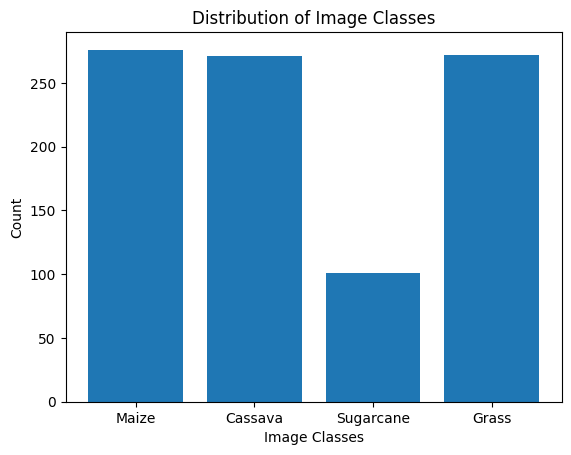

In [ ]:
image_classes = ['Maize', 'Cassava', 'Sugarcane','Grass']
class_counts = [len(maize_images), len(cassava_images),len(sugarcane_images),len(grass_images)]

# Create the bar chart
plt.bar(image_classes, class_counts)

# Add labels and title
plt.xlabel('Image Classes')
plt.ylabel('Count')
plt.title('Distribution of Image Classes')

# Display the chart
plt.show()

### SIFT feature extraction

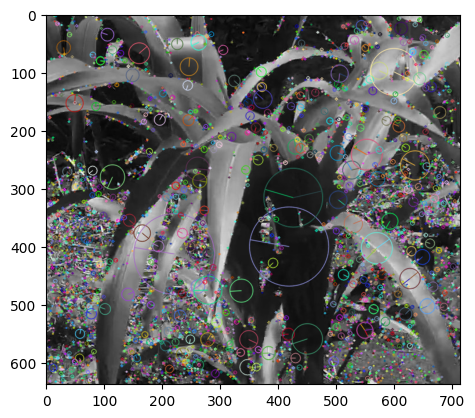

In [ ]:
# using SIFT to extract features
img = cv2.imread(str(maize_images[0]))
sift = cv2.xfeatures2d.SIFT_create()
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

# Mark interest points
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)

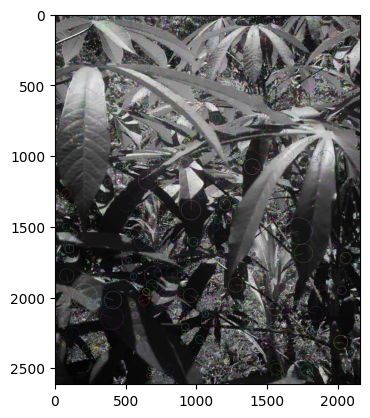

In [ ]:
# using SIFT to extract features for cassava
img = cv2.imread(str(cassava_images[0]))
sift = cv2.xfeatures2d.SIFT_create()
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

# Mark interest points
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)

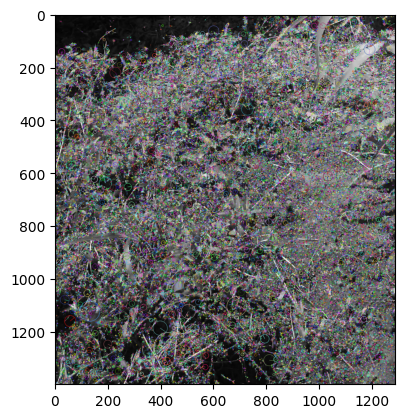

In [ ]:
# using SIFT to extract features for Banana
img = cv2.imread(str(grass_images[0]))
sift = cv2.xfeatures2d.SIFT_create()
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

# Mark interest points
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)

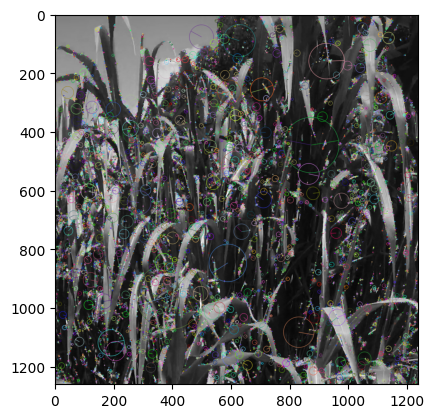

In [ ]:
# using SIFT to extract features for Sugarcane
img = cv2.imread(str(sugarcane_images[0]))
sift = cv2.xfeatures2d.SIFT_create()
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

# Mark interest points
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)

### KNN and Naive Bayes Models
Use SIFT to extract features to use for classification

In [ ]:
def knn_naive_bayes_classifiers(thresh):

  t0 = time.time()

  def extract_sift_features(img, th):
    sift = cv2.xfeatures2d.SIFT_create(th)
    keypoints, descriptors = sift.detectAndCompute(img, None)
    return descriptors

  '''
  All the files appended to the image_path list are passed through the
  extract_sift_features functions which returns the descriptors which are
  appended to the features list and then stacked vertically in the form
  of a numpy array.
  '''

  features = []
  for file in maize_images:
    img = cv2.imread(str(file))
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_des = extract_sift_features(img, thresh)
      if img_des is not None:
        features.append(img_des)
  for file in cassava_images:
    img = cv2.imread(str(file))
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_des = extract_sift_features(img, thresh)
      if img_des is not None:
        features.append(img_des)
  for file in sugarcane_images:
    img = cv2.imread(str(file))
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_des = extract_sift_features(img, thresh)
      if img_des is not None:
        features.append(img_des)
  for file in grass_images:
    img = cv2.imread(str(file))
    if img is not None:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_des = extract_sift_features(img, thresh)
      if img_des is not None:
        features.append(img_des)

  features = np.vstack(features)

  '''
  K-Means clustering is then performed on the feature array obtained
  from the previous step. The centres obtained after clustering are
  further used for bagging of features.
  '''

  k = 150
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
  flags = cv2.KMEANS_RANDOM_CENTERS
  compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

  '''
  The bag_of_features function assigns the features which are similar
  to a specific cluster centre thus forming a Bag of Words approach.
  '''

  def bag_of_features(features, centres, k = 300):
      vec = np.zeros((1, k))
      for i in range(features.shape[0]):
          feat = features[i]
          diff = np.tile(feat, (k, 1)) - centres
          dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
          idx_dist = dist.argsort()
          idx = idx_dist[0]
          vec[0][idx] += 1
      return vec

  labels = []
  vec = []
  for file in maize_images:
    img = cv2.imread(str(file))
    if img is not None:
      img_des = extract_sift_features(img, thresh)
      if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        labels.append("maize")
  for file in cassava_images:
    img = cv2.imread(str(file))
    if img is not None:
      img_des = extract_sift_features(img, thresh)
      if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        labels.append("cassava")
  for file in sugarcane_images:
    img = cv2.imread(str(file))
    if img is not None:
      img_des = extract_sift_features(img, thresh)
      if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        labels.append("sugarcane")
  for file in grass_images:
    img = cv2.imread(str(file))
    if img is not None:
      img_des = extract_sift_features(img, thresh)
      if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
        labels.append("grass")
  vec = np.vstack(vec)

  '''
  Splitting the data formed into test and split data and training the
  KNN and NaiveBayes  Classifiers.
  '''


  X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)
  knn_classifier = KNeighborsClassifier(n_neighbors=3)
  knn_classifier.fit(X_train, y_train)
  knn_preds = knn_classifier.predict(X_test)
  knn_accuracy = accuracy_score(y_test, knn_preds)
  conf_matrix_knn = confusion_matrix(y_test, knn_preds)


  gausian_bayesian_classifier = GaussianNB()
  gausian_bayesian_classifier.fit(X_train, y_train)
  bayes_predictions = gausian_bayesian_classifier.predict(X_test)
  bayes_accuracy = accuracy_score(y_test, bayes_predictions)
  conf_matrix_gaussian = confusion_matrix(y_test, bayes_predictions)



  t1 = time.time()

  return knn_accuracy*100, conf_matrix_knn, (t1-t0), bayes_accuracy*100, conf_matrix_gaussian


accuracy_knn = {}
accuracy_gausian = {}
conf_matrix_knn = {}
conf_matrix_gaussian = {}
timer = []
for i in range(5,26,5):
  print('\nCalculating for a threshold of {}'.format(i))
  data = knn_naive_bayes_classifiers(i)
  accuracy_knn[i] = data[0]
  accuracy_gausian[i] = data[3]
  conf_mat = data[1]
  conf_matrix_knn[i] = data[1]
  conf_matrix_gaussian[i] = data[4]
  timer.append(data[2])
  print('\nKNN Performance Report\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[0],data[2],data[1]))
  print('\nGausianNB Performance Report\nAccuracy = {}\nTime taken = {} sec\nConfusion matrix :\n{}'.format(data[3],data[2],data[4]))


Calculating for a threshold of 5

KNN Performance Report
Accuracy = 52.17391304347826
Time taken = 2522.995831489563 sec
Confusion matrix :
[[31  4  8  3]
 [18 37  7  2]
 [18 11 24  1]
 [12  1  3  4]]

GausianNB Performance Report
Accuracy = 36.41304347826087
Time taken = 2522.995831489563 sec
Confusion matrix :
[[10  2  1 33]
 [17 22 12 13]
 [15  4 16 19]
 [ 0  1  0 19]]

Calculating for a threshold of 10

KNN Performance Report
Accuracy = 57.065217391304344
Time taken = 2538.5178577899933 sec
Confusion matrix :
[[36  2  9  4]
 [ 9 42  9  1]
 [18 11 20  3]
 [13  0  0  7]]

GausianNB Performance Report
Accuracy = 43.47826086956522
Time taken = 2538.5178577899933 sec
Confusion matrix :
[[14  5  1 31]
 [16 36  0  9]
 [15 10 10 17]
 [ 0  0  0 20]]

Calculating for a threshold of 15

KNN Performance Report
Accuracy = 66.84782608695652
Time taken = 2520.185782432556 sec
Confusion matrix :
[[37  4  6  9]
 [ 5 45  4  0]
 [12  7 28  1]
 [12  0  1 13]]

GausianNB Performance Report
Accuracy = 

In [ ]:
sum(accuracy_knn.values())/len(accuracy_knn.values())

61.30434782608695

In [ ]:
sum(accuracy_gausian.values())/len(accuracy_gausian.values())


44.34782608695652

In [ ]:
conf_matrix_knn

{5: array([[31,  4,  8,  3],
        [18, 37,  7,  2],
        [18, 11, 24,  1],
        [12,  1,  3,  4]]),
 10: array([[36,  2,  9,  4],
        [ 9, 42,  9,  1],
        [18, 11, 20,  3],
        [13,  0,  0,  7]]),
 15: array([[37,  4,  6,  9],
        [ 5, 45,  4,  0],
        [12,  7, 28,  1],
        [12,  0,  1, 13]]),
 20: array([[38,  1,  6, 12],
        [ 8, 41,  9,  0],
        [14,  3, 27,  3],
        [14,  0,  0,  8]]),
 25: array([[36,  1,  5, 13],
        [ 4, 49,  6,  0],
        [13,  5, 31,  2],
        [ 7,  0,  2, 10]])}

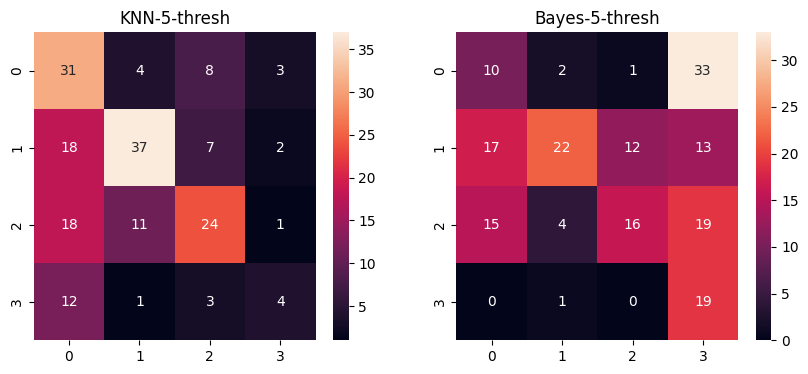

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
sns.heatmap(conf_matrix_knn[5], annot=True, fmt='g',ax=ax1)
sns.heatmap(conf_matrix_gaussian[5], annot=True, fmt='g',ax=ax2)
ax1.set_title('KNN-5-thresh')
ax2.set_title('Bayes-5-thresh')
plt.show()

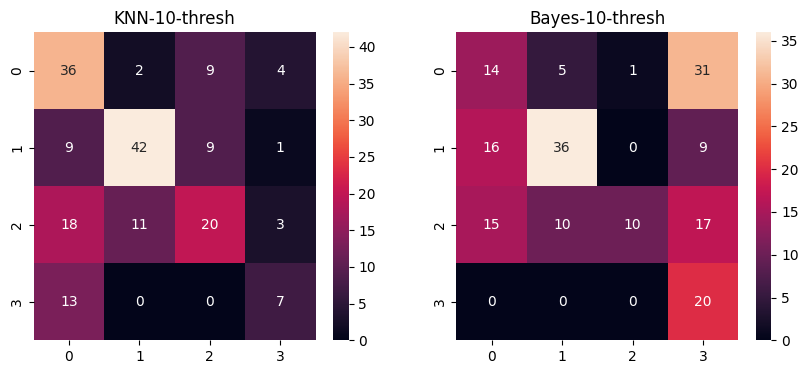

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
sns.heatmap(conf_matrix_knn[10], annot=True, fmt='g',ax=ax1)
sns.heatmap(conf_matrix_gaussian[10], annot=True, fmt='g',ax=ax2)
ax1.set_title('KNN-10-thresh')
ax2.set_title('Bayes-10-thresh')
plt.show()

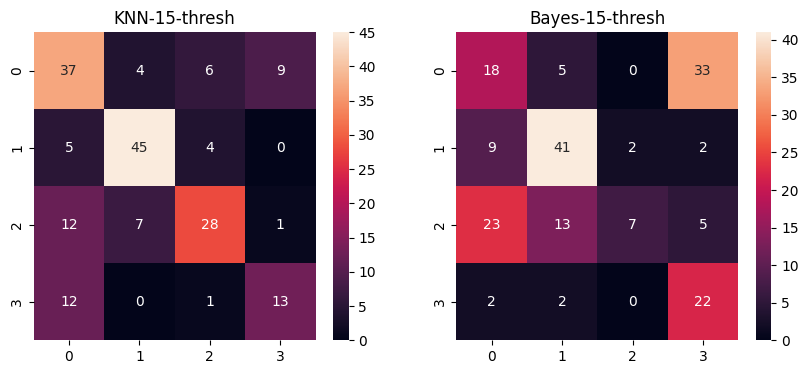

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
sns.heatmap(conf_matrix_knn[15], annot=True, fmt='g',ax=ax1)
sns.heatmap(conf_matrix_gaussian[15], annot=True, fmt='g',ax=ax2)
ax1.set_title('KNN-15-thresh')
ax2.set_title('Bayes-15-thresh')
plt.show()

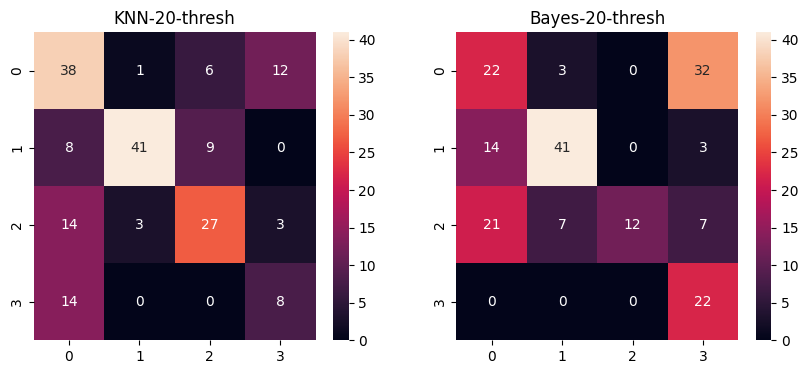

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
sns.heatmap(conf_matrix_knn[20], annot=True, fmt='g',ax=ax1)
sns.heatmap(conf_matrix_gaussian[20], annot=True, fmt='g',ax=ax2)
ax1.set_title('KNN-20-thresh')
ax2.set_title('Bayes-20-thresh')
plt.show()

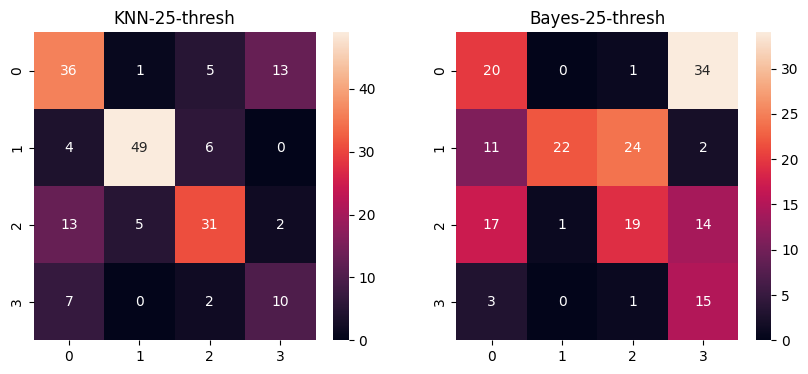

In [ ]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))
sns.heatmap(conf_matrix_knn[25], annot=True, fmt='g',ax=ax1)
sns.heatmap(conf_matrix_gaussian[25], annot=True, fmt='g',ax=ax2)
ax1.set_title('KNN-25-thresh')
ax2.set_title('Bayes-25-thresh')
plt.show()

In [ ]:
# comparing there accuracys
import pandas as pd
combined_dict = {"KNN":accuracy_knn, "bayes":accuracy_gausian}
combined_dict
df = pd.DataFrame(combined_dict)
df

,KNN,bayes
5,52.173913,36.413043
10,57.065217,43.478261
15,66.847826,47.826087
20,61.956522,52.717391
25,68.478261,41.304348


Text(0.5, 0, 'SIFT-Threshold')

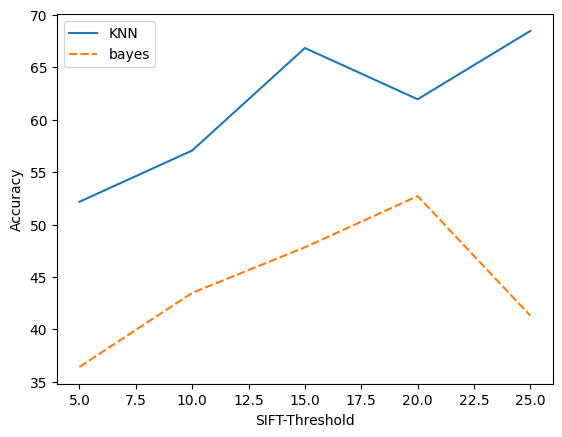

In [ ]:
plot = sns.lineplot(data=df)
plot.set_ylabel("Accuracy")
plot.set_xlabel("SIFT-Threshold")
